In [265]:
import pandas as pd
import os

# Load the dataset
df = pd.read_csv('E:/Master project/Cancer_data.csv')
df.head(10)


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
5,27,0,37.105162,0,1,3.941905,2.324274,0,0
6,80,1,20.701994,0,0,8.482031,3.152943,0,0
7,40,0,20.301121,1,0,4.929827,2.247995,1,0
8,58,1,30.274525,0,1,4.719025,0.943161,1,1
9,77,0,25.275712,0,1,4.903125,2.539487,0,0


In [266]:
# Create folder to store both files
folder_path = 'E:/FinalProject/Cleaned_Data'
os.makedirs(folder_path, exist_ok=True)

# Save original data before cleaning
before_path = os.path.join(folder_path, 'Cancer_data_before_cleaning.csv')
df.to_csv(before_path, index=False)

print(f"✅ Original data saved to:\n{before_path}")


✅ Original data saved to:
E:/FinalProject/Cleaned_Data\Cancer_data_before_cleaning.csv


In [267]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Show how many rows were removed
print(f"Original rows: {len(df)}")
print(f"After removing duplicates: {len(df_cleaned)}")
print(f"Duplicates removed: {len(df) - len(df_cleaned)}")


Original rows: 1500
After removing duplicates: 1500
Duplicates removed: 0


In [268]:
# Save cleaned dataset
after_path = os.path.join(folder_path, 'Cancer_data_after_cleaning.csv')
df_cleaned.to_csv(after_path, index=False)

print(f"✅ Cleaned data saved to:\n{after_path}")


✅ Cleaned data saved to:
E:/FinalProject/Cleaned_Data\Cancer_data_after_cleaning.csv


In [269]:
# Compare row counts
print("Rows before cleaning:", df.shape[0])
print("Rows after cleaning:", df_cleaned.shape[0])


Rows before cleaning: 1500
Rows after cleaning: 1500


In [270]:
# Compute correlation matrix
correlation_matrix = df_cleaned.corr(numeric_only=True)  # Only for numeric columns

# Display the matrix
correlation_matrix


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.000000,0.007145,0.030246,-0.013914,-0.027025,0.016396,0.003209,-0.010996,0.196603
Gender,0.007145,1.000000,-0.012516,0.035384,-0.004674,0.023401,0.009723,0.007657,0.250336
BMI,0.030246,-0.012516,1.000000,-0.012616,0.011392,0.011480,0.004711,-0.010824,0.187560
Smoking,-0.013914,0.035384,-0.012616,1.000000,-0.021039,-0.043817,-0.001660,0.016368,0.226999
GeneticRisk,-0.027025,-0.004674,0.011392,-0.021039,1.000000,-0.039721,-0.016864,-0.010833,0.253472
PhysicalActivity,0.016396,0.023401,0.011480,-0.043817,-0.039721,1.000000,0.033856,0.018136,-0.150089
AlcoholIntake,0.003209,0.009723,0.004711,-0.001660,-0.016864,0.033856,1.000000,0.055403,0.212772
CancerHistory,-0.010996,0.007657,-0.010824,0.016368,-0.010833,0.018136,0.055403,1.000000,0.392188
Diagnosis,0.196603,0.250336,0.187560,0.226999,0.253472,-0.150089,0.212772,0.392188,1.000000


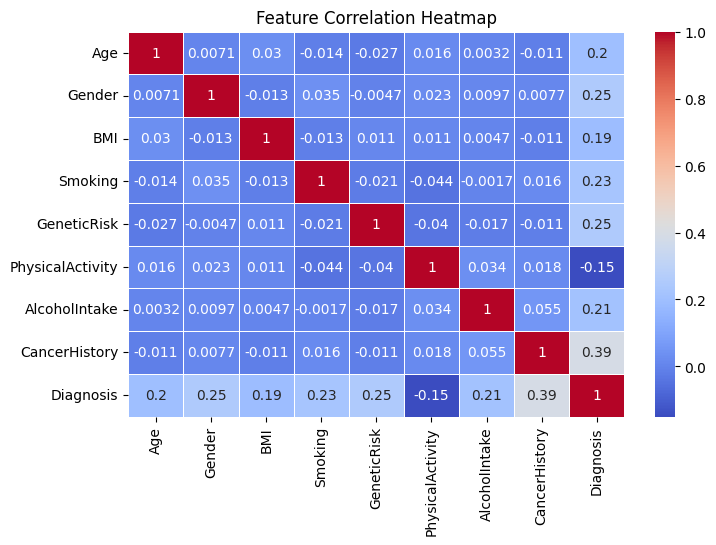

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set the plot size
plt.figure(figsize=(8, 5))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set title
plt.title('Feature Correlation Heatmap')

# Show the plot
plt.show()


In [272]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [273]:
# Encode categorical columns if present
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)


In [274]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report



In [275]:
target_col = 'Diagnosis'  # exact column name

X = df_cleaned.drop(columns=[target_col])  # Drop Diagnosis column from features
y = df_cleaned[target_col]                  # Target column

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (1500, 8)
Target shape: (1500,)


In [276]:
from imblearn.over_sampling import SMOTE


In [277]:
 # print first 5 rows of scaled train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Train feature shape: (1200, 8)
Test feature shape: (300, 8)
Train target shape: (1200,)
Test target shape: (300,)


In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  # Fit scaler only on train data
X_test = scaler.transform(X_test)        # Apply scaler on test data
print(X_train[:5]) 

[[-0.35750835 -0.98675438  0.28128291 -0.60559276 -0.74124932  0.80076495
   1.18004581 -0.40626167]
 [ 0.59847151 -0.98675438 -1.36900898 -0.60559276  0.74124932 -0.06802927
   1.63576969 -0.40626167]
 [ 0.48600329  1.01342342  1.6400677  -0.60559276 -0.74124932 -1.48681391
  -0.60849289 -0.40626167]
 [-0.35750835  1.01342342 -0.09329229 -0.60559276 -0.74124932  0.8300078
  -0.19300973 -0.40626167]
 [ 0.5422374  -0.98675438  0.02346343 -0.60559276 -0.74124932  1.5424898
   1.59887962 -0.40626167]]


In [279]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [280]:
import numpy as np
import pandas as pd

# Before SMOTE
print("Before SMOTE:", np.bincount(y_train))

# After SMOTE
print("After SMOTE:", np.bincount(y_train_resampled))


Before SMOTE: [759 441]
After SMOTE: [759 759]


In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

# Convert back to DataFrame after scaling to retain column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_test, y_pred, zero_division=1))
    print("-" * 40)
    
    results[name] = (acc, f1)

best_model = max(results, key=lambda k: results[k][1])
print(f"Best model is: {best_model} with Accuracy: {results[best_model][0]:.4f}, F1-score: {results[best_model][1]:.4f}")


Model: Logistic Regression
Accuracy: 0.8733
F1-score: 0.8417
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       184
           1       0.81      0.87      0.84       116

    accuracy                           0.87       300
   macro avg       0.86      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300

----------------------------------------


D:\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: Random Forest
Accuracy: 0.9233
F1-score: 0.8987
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       184
           1       0.92      0.88      0.90       116

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

----------------------------------------
Model: SVM
Accuracy: 0.8833
F1-score: 0.8511
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       184
           1       0.84      0.86      0.85       116

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

----------------------------------------
Model: XGBoost
Accuracy: 0.9100
F1-score: 0.8821
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       184
      

In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit on SMOTE-resampled data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf_model.predict(X_test)


In [283]:
from sklearn.metrics import classification_report

print("Best RF Params:", grid_search_rf.best_params_)
print(classification_report(y_test, y_pred_rf))


Best RF Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       184
           1       0.92      0.88      0.90       116

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



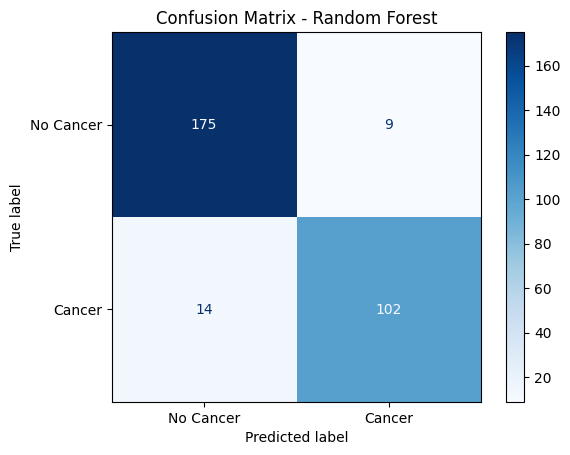

In [284]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer", "Cancer"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


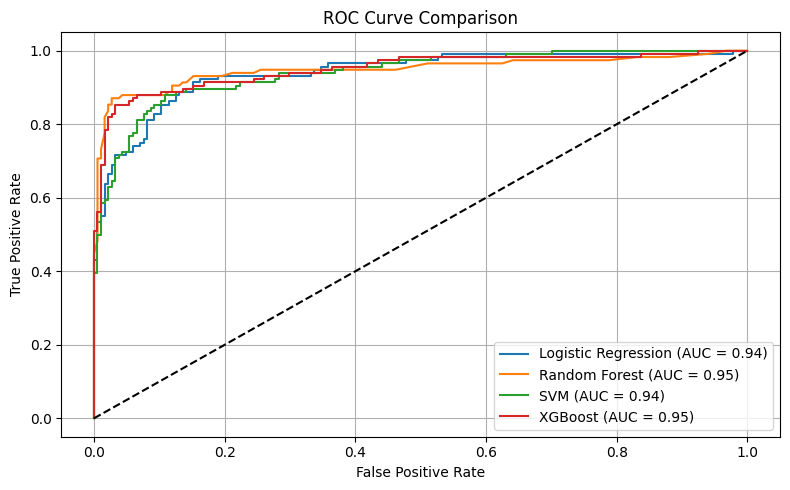

In [285]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Plot ROC for all models
plt.figure(figsize=(8, 5))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    else:
        y_scores = model.decision_function(X_test)  # For models like SVM without predict_proba

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


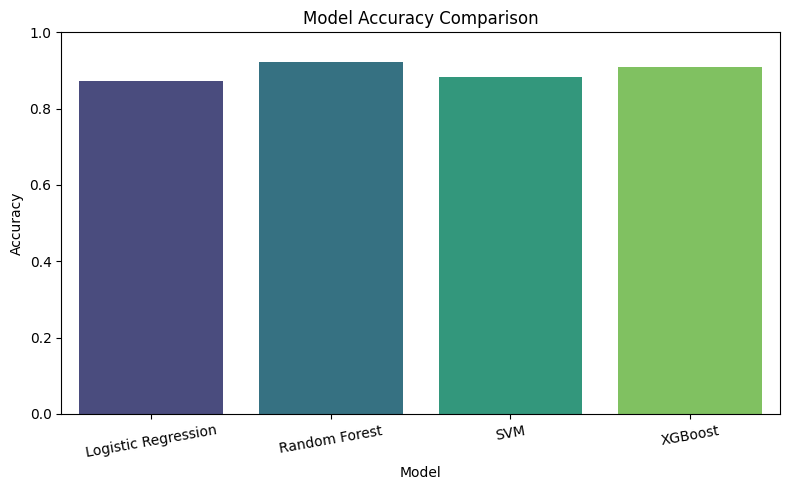

Best model based on accuracy is: Random Forest with accuracy 0.9233


In [286]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare DataFrame for Seaborn
plot_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [acc for acc, f1 in results.values()]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=plot_df, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# Summary printout based on accuracy
best_model = plot_df.loc[plot_df['Accuracy'].idxmax()]
print(f"Best model based on accuracy is: {best_model['Model']} with accuracy {best_model['Accuracy']:.4f}")


In [287]:
print(df_cleaned.columns)


Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')


In [288]:
# Assuming your cleaned dataframe is named df_cleaned
target_col = 'Diagnosis'  # or the exact column name in your dataset

X = df_cleaned.drop(columns=[target_col])  # Features
y = df_cleaned[target_col]                 # Target


In [289]:
from sklearn.model_selection import train_test_split

# Split data with stratification to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1200, 8)
Test shape: (300, 8)


In [290]:
print("Train target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))


Train target distribution:
Diagnosis
0    0.628333
1    0.371667
Name: proportion, dtype: float64

Test target distribution:
Diagnosis
0    0.63
1    0.37
Name: proportion, dtype: float64


In [291]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data


In [292]:
# Assuming X is the original (unscaled) DataFrame
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)


In [293]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_model.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       189
           1       0.95      0.88      0.92       111

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.94      0.94      0.94       300



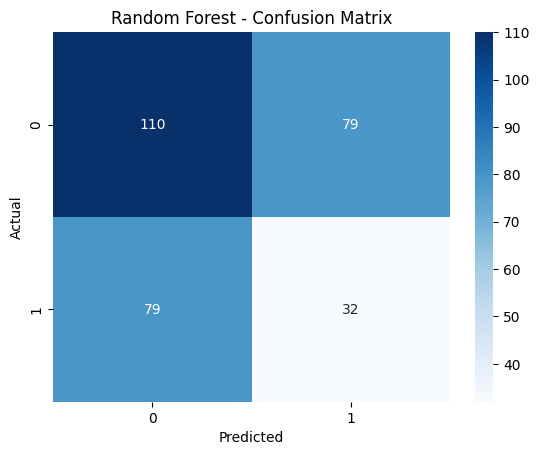

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest - Confusion Matrix")
plt.show()


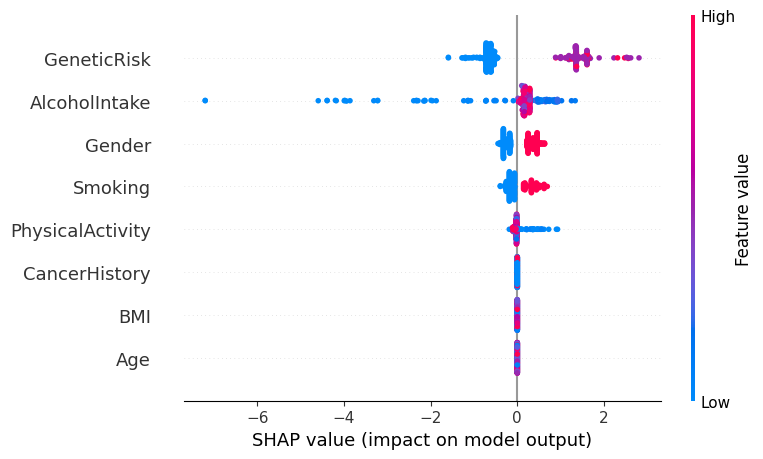

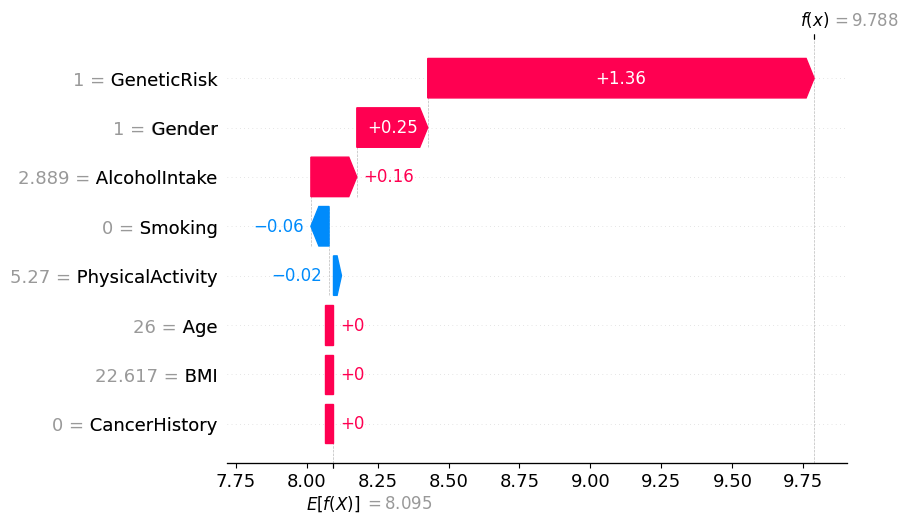

In [295]:
# After training and testing your ML model

import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainer based on your model type
explainer = shap.Explainer(model, X_train)  # Adjust as needed

# Calculate SHAP values for your test data
shap_values = explainer(X_test)

# Visualize global feature importance
shap.summary_plot(shap_values, X_test)

# Visualize explanation for a single patient
shap.plots.waterfall(shap_values[0])

plt.show()


In [296]:
samples = [
    [25, 0, 0.5, 100, 1, 0.1, 0.2, 0.1],  # Very low risk
    [30, 0, 1.0, 110, 2, 0.2, 0.3, 0.2],  # Still low risk
    [35, 0, 1.5, 120, 3, 0.3, 0.4, 0.3],  # Moderate risk
]

for data in samples:
    scaled = scaler.transform([data])
    prediction = rf_model.predict(scaled)
    print("Input:", data, "=>", "Cancer Positive" if prediction[0] == 1 else "Negative")



Input: [25, 0, 0.5, 100, 1, 0.1, 0.2, 0.1] => Negative
Input: [30, 0, 1.0, 110, 2, 0.2, 0.3, 0.2] => Cancer Positive
Input: [35, 0, 1.5, 120, 3, 0.3, 0.4, 0.3] => Cancer Positive


D:\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [297]:
import pandas as pd

# Use the same column names as in training
feature_names = X.columns  # This ensures exact match with StandardScaler

# New samples to test
samples = [
    [25, 0, 0.5, 100, 1, 0.1, 0.2, 0.1],
    [30, 0, 1.0, 110, 2, 0.2, 0.3, 0.2],
    [35, 0, 1.5, 120, 3, 0.3, 0.4, 0.3],
]

for data in samples:
    # Create DataFrame with correct feature names
    df_input = pd.DataFrame([data], columns=feature_names)
    
    # Scale the input
    scaled = scaler.transform(df_input)
    
    # Predict
    prediction = rf_model.predict(scaled)
    print("Input:", data, "=>", "Cancer Positive" if prediction[0] == 1 else "Negative")


Input: [25, 0, 0.5, 100, 1, 0.1, 0.2, 0.1] => Negative
Input: [30, 0, 1.0, 110, 2, 0.2, 0.3, 0.2] => Cancer Positive
Input: [35, 0, 1.5, 120, 3, 0.3, 0.4, 0.3] => Cancer Positive


In [298]:
# Check if rf_model exists
print(rf_model)


RandomForestClassifier(random_state=42)


In [299]:
# 6 Save model to file
# Save both model and scaler (very important to save scaler too)
import joblib

# Save the model
joblib.dump(rf_model, 'cancer_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
